https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/

In [1]:
from pandas import read_csv

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"

dataset = read_csv( url , header = None )

data = dataset.values


X = data[ : , : -1 ]

y = data[ : , -1 ]

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
X = X.astype( 'float32' )

y = LabelEncoder().fit_transform( y  )

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
model = KNeighborsClassifier()

In [8]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [9]:
cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 1 )

In [10]:
from sklearn.model_selection import cross_val_score

In [13]:
n_scores = cross_val_score( model , X , y , scoring = 'accuracy' , cv = cv , n_jobs = -1 , error_score = 'raise' )

print( n_scores )

[0.80952381 0.95238095 0.9047619  0.76190476 0.71428571 0.66666667
 0.76190476 0.80952381 0.9        0.65       0.66666667 0.71428571
 0.80952381 0.85714286 0.76190476 0.80952381 0.85714286 0.85714286
 0.85       0.8        0.80952381 0.80952381 0.80952381 0.80952381
 0.71428571 0.76190476 0.76190476 0.76190476 0.85       0.9       ]


In [14]:
from numpy import mean

from numpy import std

In [16]:
print( f' {mean( n_scores ):.3f} ( {std( n_scores ):.3f})' )

 0.797 ( 0.073)


# IQR Robust Scaler Transform

In [17]:
from sklearn.preprocessing import RobustScaler

In [27]:
scaler = RobustScaler( quantile_range = ( 25 , 75 ) ) 

model = KNeighborsClassifier()

In [28]:
from sklearn.pipeline import Pipeline

In [29]:
pipeline = Pipeline( steps =[ ( 'scaler' ,  scaler ) ,
                              ( 'model' , model ) ] )

In [30]:
cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 1 )

In [31]:
n_scores = cross_val_score( pipeline , X , y , scoring = 'accuracy' , cv = cv , n_jobs = -1 , error_score = 'raise' )

print( f'{mean( n_scores ):.3f} ( {std( n_scores ):.3f})' )

 0.819 ( 0.076)


# Explore Robust Scaler Range

In [32]:
def get_models():

    models = dict()

    for value in [ 1 , 5 , 10 , 15 , 20 , 25 , 30 ] :

        scaler = RobustScaler( quantile_range = ( value , 100 - value ) )

        model = KNeighborsClassifier()
        
        pipeline =  Pipeline( steps = [ ( 'scaler' , scaler ) ,
                                        ( 'model' , model ) ] )

        models[ f'( {value} , {100 - value} )' ] = pipeline

    return models

In [34]:
def evaluate_model( model ) :
    
    cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 1 )

    scores = cross_val_score( model , X , y , scoring = 'accuracy' , cv = cv , n_jobs = -1 , error_score = 'raise' )
    
    return scores

In [42]:
results = list( )

names = list( )

models = get_models( )

for name , model in models.items( ) :
    
    n_scores = evaluate_model( model )
    
    names.append( name )
    
    results.append( n_scores )
    
    print( f'scaler range : {name} | accuracy : {mean( n_scores ):.3f} ( {std( n_scores ):.3f})' )

scaler range : ( 1 , 99 ) | accuracy : 0.818 ( 0.069)
scaler range : ( 5 , 95 ) | accuracy : 0.813 ( 0.085)
scaler range : ( 10 , 90 ) | accuracy : 0.812 ( 0.076)
scaler range : ( 15 , 85 ) | accuracy : 0.811 ( 0.081)
scaler range : ( 20 , 80 ) | accuracy : 0.811 ( 0.080)
scaler range : ( 25 , 75 ) | accuracy : 0.819 ( 0.076)
scaler range : ( 30 , 70 ) | accuracy : 0.816 ( 0.072)


In [44]:
from matplotlib import pyplot

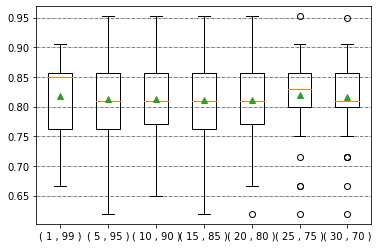

In [56]:
pyplot.boxplot( results , labels = names , showmeans = True )

pyplot.grid( axis = 'y' , color='black', linestyle='-.', linewidth=0.5)

pyplot.show()